In [1]:
target = 'title'

In [2]:
pwd

'/Users/grizzlym1/Library/Mobile Documents/com~apple~CloudDocs/Download_ALL_Apple/github/2024-NT-Python-and-PowerBI/dev'

In [3]:
! ls -l ../data/

total 2265936
-rw-r--r--  1 grizzlym1  staff  1160157683 Mar 23  2023 LoanStats_web.csv


In [4]:
! head -10 ../data/*.csv

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [5]:
### https://chat.openai.com/share/d835f292-f1f2-4eeb-85c5-6e437210298e

import pandas as pd

# Assuming `data.csv` is your file name
df = pd.read_csv('../data/LoanStats_web.csv', dtype=str)

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns where more than 30% of the data is missing
columns_to_keep = missing_percentage[missing_percentage <= 30].index.tolist()
filtered_df = df[columns_to_keep]

# If you need to check the resulting DataFrame or save it to a new file
print(filtered_df.head())  # To display the first few rows of the filtered DataFrame
### filtered_df.to_csv('filtered_loanstats_web.csv', index=False)  # To save the filtered DataFrame to a new CSV file

  loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0     12800       12800           12800   36 months   11.99%      425.09   
1      9000        9000            9000   36 months   15.31%      313.36   
2      8000        8000            8000   36 months   10.75%      260.97   
3     25000       25000           25000   60 months   12.99%       568.7   
4     35000       35000           35000   60 months   18.25%      893.54   

  grade sub_grade              emp_title emp_length  ... pct_tl_nvr_dlq  \
0     C        C1  LOGISTICS COORDINATOR    6 years  ...            100   
1     C        C5  Senior Case Assistant    9 years  ...           92.3   
2     B        B4                     Vp    5 years  ...            100   
3     C        C2         Administration  10+ years  ...            100   
4     D        D3           Electrician   10+ years  ...            100   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              100     

In [7]:
#filtered_df['loan_amnt'].isnull().value_counts()

In [8]:
#! pip install numpy scipy

In [9]:
df = filtered_df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432466 entries, 0 to 1432465
Data columns (total 100 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   loan_amnt                   1432440 non-null  object
 1   funded_amnt                 1432440 non-null  object
 2   funded_amnt_inv             1432440 non-null  object
 3   term                        1432440 non-null  object
 4   int_rate                    1432440 non-null  object
 5   installment                 1432440 non-null  object
 6   grade                       1432440 non-null  object
 7   sub_grade                   1432440 non-null  object
 8   emp_title                   1302202 non-null  object
 9   emp_length                  1323970 non-null  object
 10  home_ownership              1432440 non-null  object
 11  annual_inc                  1432440 non-null  object
 12  verification_status         1432440 non-null  object
 13  issue_d    

### คำถาม: ในข้อมูลนี้เป็นลูกค้าที่ได้รับเงินกู้ทั้งหมด อยากทราบว่า การระบุ title หรือ ไม่ระบุ มีความสัมพันธ์กับจำนวนเงินกู้หรือไม่ มากน้อยแค่ไหน

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# โหลดข้อมูล (สมมติฐาน)
# df = pd.read_csv('path_to_your_file.csv')

# สร้างสำเนาเพื่อหลีกเลี่ยง SettingWithCopyWarning
df_clean = df.copy()

# ลบแถวที่ 'loan_amnt' เป็น NaN
df_clean = df_clean.dropna(subset=['loan_amnt'])

# แปลงคอลัมน์ 'loan_amnt' ให้เป็นชนิดข้อมูลตัวเลขโดยใช้ pd.to_numeric() 
# และจัดการกับค่าที่ไม่สามารถแปลงเป็นตัวเลขได้ โดยการแปลงค่าเหล่านั้นให้กลายเป็น NaN
### df_clean['loan_amnt'] = pd.to_numeric(df_clean['loan_amnt'], errors='coerce')

# แยกข้อมูลเป็นสองกลุ่ม: target เป็น null และไม่เป็น null
loan_amnt_null = df_clean[df_clean[target].isnull()]['loan_amnt']
loan_amnt_notnull = df_clean[df_clean[target].notnull()]['loan_amnt']

# แปลงชนิดข้อมูลเป็นตัวเลขและลบค่า NaN
loan_amnt_null = pd.to_numeric(loan_amnt_null, errors='coerce').dropna()
loan_amnt_notnull = pd.to_numeric(loan_amnt_notnull, errors='coerce').dropna()

# ทำการทดสอบ Mann-Whitney U
stat, p = mannwhitneyu(loan_amnt_null, loan_amnt_notnull, alternative='two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

# ตีความผลลัพธ์
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=16183713203.500, p=0.020
Different distribution (reject H0)


In [12]:
loan_amnt_null

16        18000
49        12000
70         5800
73         5200
88        16550
          ...  
330857    28600
430327     6875
432162    20075
434410    40000
434412    14000
Name: loan_amnt, Length: 23173, dtype: int64

In [13]:
loan_amnt_notnull

0          12800
1           9000
2           8000
3          25000
4          35000
           ...  
1432459     5000
1432460     6000
1432461    16000
1432462    16000
1432463    29250
Name: loan_amnt, Length: 1409267, dtype: int64

In [14]:
#! pip install seaborn

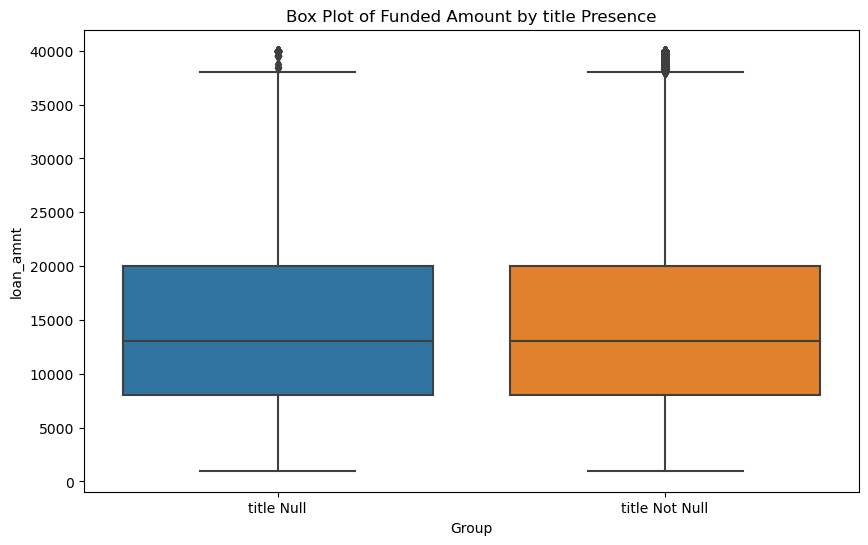

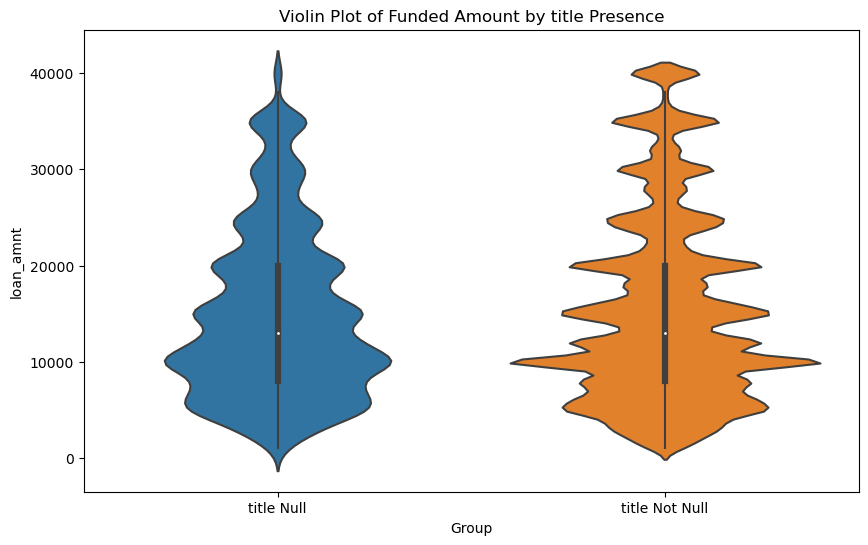

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# สร้าง DataFrame เพื่อการแสดงผล
# หมายเหตุ: คุณต้องปรับเปลี่ยนตัวแปร loan_amnt_null และ loan_amnt_notnull ให้เกี่ยวข้องกับตัวแปร target ของคุณ
plot_data = pd.DataFrame({
    'loan_amnt': pd.concat([loan_amnt_null, loan_amnt_notnull]),
    'Group': [f'{target} Null']*len(loan_amnt_null) + [f'{target} Not Null']*len(loan_amnt_notnull)
})

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='loan_amnt', data=plot_data)
plt.title(f'Box Plot of Funded Amount by {target} Presence')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='loan_amnt', data=plot_data)
plt.title(f'Violin Plot of Funded Amount by {target} Presence')
plt.show()

In [16]:
df[[target,'loan_amnt']].describe()

,title,loan_amnt
count,1409267,1432440
unique,13,1561
top,Debt consolidation,10000
freq,777180,129564


In [17]:
df_clean[[target,'loan_amnt']].describe()

,title,loan_amnt
count,1409267,1432440
unique,13,1561
top,Debt consolidation,10000
freq,777180,129564


In [18]:
df_clean.groupby(target).size()

title
Business                      14798
Car financing                 15108
Credit Card Consolidation         1
Credit card refinancing      329697
Debt consolidation           777180
Green loan                      894
Home buying                    9813
Home improvement              97620
Major purchase                32254
Medical expenses              18575
Moving and relocation          9625
Other                         93274
Vacation                      10428
dtype: int64